In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st

In [46]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('singapur.csv',encoding='ISO-8859-1') 
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,595549893585733310,HCK[R&F] 2BR 2-4pax City View/Walk CIQ/Sunset@JB,95993346,Kylie,North Region,Woodlands,1.45838,103.77033,Entire home/apt,58,1,8,2022-05-01,3.43,1,18,8,NaN
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33432,103.78521,Private room,80,92,18,2014-12-26,0.18,1,365,0,NaN
2,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34537,103.95887,Private room,143,92,20,2020-01-17,0.16,6,365,0,NaN
3,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34754,103.95958,Private room,83,92,24,2019-10-13,0.18,6,365,0,NaN
4,71903,Room 2-near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34531,103.96100,Private room,83,92,47,2020-01-09,0.35,6,365,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094,619111600921554733,JB Suasana-Spacious Comforts 1BR-vacations Trips,275883777,Lawrence,North Region,Woodlands,1.46257,103.76248,Entire home/apt,42,1,4,2022-06-19,4.00,1,255,4,NaN
4095,48290687,âSuasanaâ@UHA 1BR 2-4pax Mint Suite near H...,41870590,UHA Management,North Region,Woodlands,1.46270,103.76233,Entire home/apt,58,1,10,2022-05-14,0.62,67,359,6,NaN
4096,42796311,Almas Suite-S-Puteri Harbour Legoland-JBæ°å±±...,256745705,Penly,West Region,Western Water Catchment,1.41857,103.64993,Private room,42,1,28,2022-06-10,1.08,4,86,14,NaN
4097,34545618,European Style Spacious Suite (JOHOR BAHRU)14p...,189276703,Alan,North Region,Lim Chu Kang,1.46470,103.70167,Entire home/apt,220,28,0,NaN,NaN,1,365,0,NaN


In [47]:
#Identificar valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                   0
name                                 0
host_id                              0
host_name                            8
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1598
reviews_per_month                 1598
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           3377
dtype: int64

In [48]:
#Rellenar los valores nulos con el objeto "anterior de la columna" de la columna "host_name"
data["host_name"]= data["host_name"].fillna(method="bfill") 
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,595549893585733310,HCK[R&F] 2BR 2-4pax City View/Walk CIQ/Sunset@JB,95993346,Kylie,North Region,Woodlands,1.45838,103.77033,Entire home/apt,58,1,8,2022-05-01,3.43,1,18,8,NaN
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33432,103.78521,Private room,80,92,18,2014-12-26,0.18,1,365,0,NaN
2,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34537,103.95887,Private room,143,92,20,2020-01-17,0.16,6,365,0,NaN
3,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34754,103.95958,Private room,83,92,24,2019-10-13,0.18,6,365,0,NaN
4,71903,Room 2-near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34531,103.96100,Private room,83,92,47,2020-01-09,0.35,6,365,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094,619111600921554733,JB Suasana-Spacious Comforts 1BR-vacations Trips,275883777,Lawrence,North Region,Woodlands,1.46257,103.76248,Entire home/apt,42,1,4,2022-06-19,4.00,1,255,4,NaN
4095,48290687,âSuasanaâ@UHA 1BR 2-4pax Mint Suite near H...,41870590,UHA Management,North Region,Woodlands,1.46270,103.76233,Entire home/apt,58,1,10,2022-05-14,0.62,67,359,6,NaN
4096,42796311,Almas Suite-S-Puteri Harbour Legoland-JBæ°å±±...,256745705,Penly,West Region,Western Water Catchment,1.41857,103.64993,Private room,42,1,28,2022-06-10,1.08,4,86,14,NaN
4097,34545618,European Style Spacious Suite (JOHOR BAHRU)14p...,189276703,Alan,North Region,Lim Chu Kang,1.46470,103.70167,Entire home/apt,220,28,0,NaN,NaN,1,365,0,NaN


In [49]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1598
reviews_per_month                 1598
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           3377
dtype: int64

In [50]:
#Rellenar valores nulos por un objeto en concreto, en este caso es una fecha para la columna last review
data["last_review"]= data["last_review"].fillna("31/12/2022") 
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,595549893585733310,HCK[R&F] 2BR 2-4pax City View/Walk CIQ/Sunset@JB,95993346,Kylie,North Region,Woodlands,1.45838,103.77033,Entire home/apt,58,1,8,2022-05-01,3.43,1,18,8,NaN
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33432,103.78521,Private room,80,92,18,2014-12-26,0.18,1,365,0,NaN
2,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34537,103.95887,Private room,143,92,20,2020-01-17,0.16,6,365,0,NaN
3,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34754,103.95958,Private room,83,92,24,2019-10-13,0.18,6,365,0,NaN
4,71903,Room 2-near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34531,103.96100,Private room,83,92,47,2020-01-09,0.35,6,365,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094,619111600921554733,JB Suasana-Spacious Comforts 1BR-vacations Trips,275883777,Lawrence,North Region,Woodlands,1.46257,103.76248,Entire home/apt,42,1,4,2022-06-19,4.00,1,255,4,NaN
4095,48290687,âSuasanaâ@UHA 1BR 2-4pax Mint Suite near H...,41870590,UHA Management,North Region,Woodlands,1.46270,103.76233,Entire home/apt,58,1,10,2022-05-14,0.62,67,359,6,NaN
4096,42796311,Almas Suite-S-Puteri Harbour Legoland-JBæ°å±±...,256745705,Penly,West Region,Western Water Catchment,1.41857,103.64993,Private room,42,1,28,2022-06-10,1.08,4,86,14,NaN
4097,34545618,European Style Spacious Suite (JOHOR BAHRU)14p...,189276703,Alan,North Region,Lim Chu Kang,1.46470,103.70167,Entire home/apt,220,28,0,31/12/2022,NaN,1,365,0,NaN


In [51]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                 1598
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           3377
dtype: int64

In [52]:
#Rellenar con el valor de media de la columna los valores nulos de la columna "reviews per month". Se utilizan 2 decimales debido a que asi son los valores encontrados en la columna. 
data["reviews_per_month"]=data["reviews_per_month"].fillna(round(data["reviews_per_month"].mean(),2))
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,595549893585733310,HCK[R&F] 2BR 2-4pax City View/Walk CIQ/Sunset@JB,95993346,Kylie,North Region,Woodlands,1.45838,103.77033,Entire home/apt,58,1,8,2022-05-01,3.43,1,18,8,NaN
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33432,103.78521,Private room,80,92,18,2014-12-26,0.18,1,365,0,NaN
2,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34537,103.95887,Private room,143,92,20,2020-01-17,0.16,6,365,0,NaN
3,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34754,103.95958,Private room,83,92,24,2019-10-13,0.18,6,365,0,NaN
4,71903,Room 2-near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34531,103.96100,Private room,83,92,47,2020-01-09,0.35,6,365,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094,619111600921554733,JB Suasana-Spacious Comforts 1BR-vacations Trips,275883777,Lawrence,North Region,Woodlands,1.46257,103.76248,Entire home/apt,42,1,4,2022-06-19,4.00,1,255,4,NaN
4095,48290687,âSuasanaâ@UHA 1BR 2-4pax Mint Suite near H...,41870590,UHA Management,North Region,Woodlands,1.46270,103.76233,Entire home/apt,58,1,10,2022-05-14,0.62,67,359,6,NaN
4096,42796311,Almas Suite-S-Puteri Harbour Legoland-JBæ°å±±...,256745705,Penly,West Region,Western Water Catchment,1.41857,103.64993,Private room,42,1,28,2022-06-10,1.08,4,86,14,NaN
4097,34545618,European Style Spacious Suite (JOHOR BAHRU)14p...,189276703,Alan,North Region,Lim Chu Kang,1.46470,103.70167,Entire home/apt,220,28,0,31/12/2022,0.88,1,365,0,NaN


In [53]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           3377
dtype: int64

In [54]:
#Debido a que en la columna "license" hay demasiados outliers, se eliminará
#Eliminamos columnas con nulos
data=data.dropna(1)

/var/folders/h7/3hswkg9n4t7_f3vwwzsc1gv40000gn/T/ipykernel_35922/3922996289.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data=data.dropna(1)


In [55]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [56]:
#Asegurar que ya no hay datos nulos en toda la base de datos
cuenta_nulos= data.isnull().sum().sum()
cuenta_nulos

0

In [57]:
#Aplicación de método de distribución normal para identificar outliers, límites de 3 desviaciones estándar para variable de price
y3=data["price"]
limite_superior3= y3.mean() + 3*y3.std()
limite_inferior3= y3.mean() - 3*y3.std()
print("Limite superior permitido", limite_superior3)
print("Limite inferior permitido", limite_inferior3)

Limite superior permitido 1499.2164553076586
Limite inferior permitido -1115.1686387670388


In [58]:
#Encontramos outliers
outliers3= data[(y3>limite_superior3)|(y3<limite_inferior3)]
outliers3
len(outliers3)

28

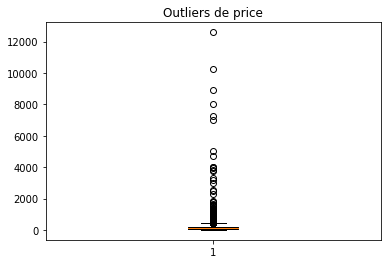

In [59]:
#Realizamos diagrama de caja o bigote
fig3 = plt.figure(figsize =(6, 4))
plt.boxplot(data["price"]) 
plt.title("Outliers de price")
plt.show() 

In [60]:
#Aplicación de método de distribución normal para identificar outliers, límites de 3 desviaciones estándar para variable de minimum nights
y4=data["minimum_nights"]
limite_superior4= y4.mean() + 3*y4.std()
limite_inferior4= y4.mean() - 3*y4.std()
print("Limite superior permitido", limite_superior4)
print("Limite inferior permitido", limite_inferior4)

Limite superior permitido 272.7985764894792
Limite inferior permitido -145.35383386932796


In [61]:
#Encontramos outliers
outliers4= data[(y4>limite_superior4)|(y4<limite_inferior4)]
outliers4
len(outliers4)

63

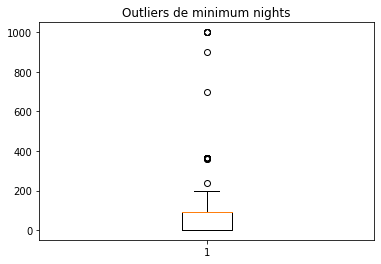

In [62]:
#Realizamos diagrama de caja o bigote
fig4 = plt.figure(figsize =(6, 4))
plt.boxplot(data["minimum_nights"]) 
plt.title("Outliers de minimum nights")
plt.show() 

In [63]:
#Aplicación de método de distribución normal para identificar outliers, límites de 3 desviaciones estándar para variable de number of reviews
y5=data["number_of_reviews"]
limite_superior5= y5.mean() + 3*y5.std()
limite_inferior5= y5.mean() - 3*y5.std()
print("Limite superior permitido", limite_superior5)
print("Limite inferior permitido", limite_inferior5)

Limite superior permitido 118.74962311570266
Limite inferior permitido -91.47906932209446


In [64]:
#Encontramos outliers
outliers5= data[(y5>limite_superior5)|(y5<limite_inferior5)]
outliers5
len(outliers5)

108

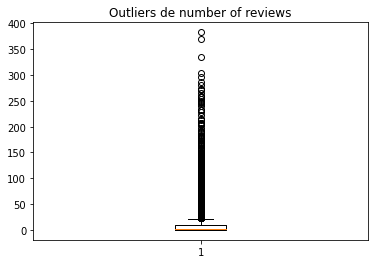

In [65]:
#Realizamos diagrama de caja o bigote
fig5 = plt.figure(figsize =(6, 4))
plt.boxplot(data["number_of_reviews"]) 
plt.title("Outliers de number of reviews")
plt.show() 

In [66]:
#Aplicación de método de distribución normal para identificar outliers, límites de 3 desviaciones estándar para variable de reviews per month
y6=data["reviews_per_month"]
limite_superior6= y6.mean() + 3*y6.std()
limite_inferior6= y6.mean() - 3*y6.std()
print("Limite superior permitido", limite_superior6)
print("Limite inferior permitido", limite_inferior6)

Limite superior permitido 4.219794675701626
Limite inferior permitido -2.455915680824826


In [67]:
#Encontramos outliers
outliers6= data[(y6>limite_superior6)|(y6<limite_inferior6)]
outliers6
len(outliers6)

103

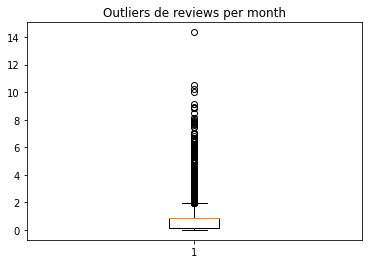

In [68]:
#Realizamos diagrama de caja o bigote
fig6 = plt.figure(figsize =(6, 4))
plt.boxplot(data["reviews_per_month"]) 
plt.title("Outliers de reviews per month")
plt.show() 

In [69]:
#Aplicación de método de distribución normal para identificar outliers, límites de 3 desviaciones estándar para variable de availability_365
y7=data["availability_365"]
limite_superior7= y7.mean() + 3*y7.std()
limite_inferior7= y7.mean() - 3*y7.std()
print("Limite superior permitido", limite_superior7)
print("Limite inferior permitido", limite_inferior7)

Limite superior permitido 644.1616608623859
Limite inferior permitido -146.78717928151252


In [70]:
#Encontramos outliers
outliers7= data[(y7>limite_superior7)|(y7<limite_inferior7)]
outliers7
len(outliers7)

0

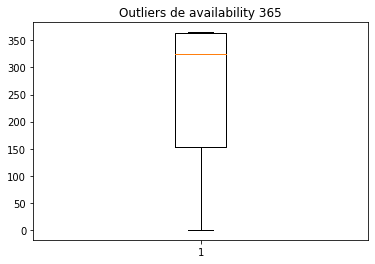

In [71]:
#Realizamos diagrama de caja o bigote
fig7 = plt.figure(figsize =(6, 4))
plt.boxplot(data["availability_365"]) 
plt.title("Outliers de availability 365")
plt.show() 

In [72]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR para columna price
y10=data["price"]

percentile2510=y10.quantile(0.25) #Q1
percentile7510=y10.quantile(0.75) #Q3
iqr10= percentile7510 - percentile2510

limite_superior_iqr10= percentile7510 + 1.5*iqr10
limite_inferior_iqr10= percentile2510 - 1.5*iqr10
print("Limite superior permitido", limite_superior_iqr10)
print("Limite inferior permitido", limite_inferior_iqr10)

Limite superior permitido 411.5
Limite inferior permitido -152.5


In [73]:
#Identificar outliers
outliers_iqr10=data[(y10>limite_superior_iqr10)|(y10<limite_inferior_iqr10)]
outliers_iqr10
len(outliers_iqr10)

346

In [74]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR para columna minimum nights
y11=data["minimum_nights"]

percentile2511=y11.quantile(0.25) #Q1
percentile7511=y11.quantile(0.75) #Q3
iqr11= percentile7511 - percentile2511

limite_superior_iqr11= percentile7511 + 1.5*iqr11
limite_inferior_iqr11= percentile2511 - 1.5*iqr11
print("Limite superior permitido", limite_superior_iqr11)
print("Limite inferior permitido", limite_inferior_iqr11)

Limite superior permitido 228.5
Limite inferior permitido -135.5


In [75]:
#Identificar outliers
outliers_iqr11=data[(y11>limite_superior_iqr11)|(y11<limite_inferior_iqr11)]
outliers_iqr11
len(outliers_iqr11)

64

In [76]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR para columna number of reviews
y12=data["number_of_reviews"]

percentile2512=y12.quantile(0.25) #Q1
percentile7512=y12.quantile(0.75) #Q3
iqr12= percentile7512 - percentile2512

limite_superior_iqr12= percentile7512 + 1.5*iqr12
limite_inferior_iqr12= percentile2512 - 1.5*iqr12
print("Limite superior permitido", limite_superior_iqr12)
print("Limite inferior permitido", limite_inferior_iqr12)

Limite superior permitido 22.5
Limite inferior permitido -13.5


In [77]:
#Identificar outliers
outliers_iqr12=data[(y12>limite_superior_iqr12)|(y12<limite_inferior_iqr12)]
outliers_iqr12
len(outliers_iqr12)

609

In [78]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR para columna reviews per month
y13=data["reviews_per_month"]

percentile2513=y13.quantile(0.25) #Q1
percentile7513=y13.quantile(0.75) #Q3
iqr13= percentile7513 - percentile2513

limite_superior_iqr13= percentile7513 + 1.5*iqr13
limite_inferior_iqr13= percentile2513 - 1.5*iqr13
print("Limite superior permitido", limite_superior_iqr13)
print("Limite inferior permitido", limite_inferior_iqr13)

Limite superior permitido 1.9449999999999998
Limite inferior permitido -0.8949999999999999


In [79]:
#Identificar outliers
outliers_iqr13=data[(y13>limite_superior_iqr13)|(y13<limite_inferior_iqr13)]
outliers_iqr13
len(outliers_iqr13)

355

In [80]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR para columna availability 365
y14=data["availability_365"]

percentile2514=y14.quantile(0.25) #Q1
percentile7514=y14.quantile(0.75) #Q3
iqr14= percentile7514 - percentile2514

limite_superior_iqr14= percentile7514 + 1.5*iqr14
limite_inferior_iqr14= percentile2514 - 1.5*iqr14
print("Limite superior permitido", limite_superior_iqr14)
print("Limite inferior permitido", limite_inferior_iqr14)

Limite superior permitido 679.75
Limite inferior permitido -162.25


In [81]:
#Identificar outliers
outliers_iqr14=data[(y14>limite_superior_iqr14)|(y14<limite_inferior_iqr14)]
outliers_iqr14
len(outliers_iqr14)

0

In [82]:
#Para tomar la decisión de a través de qué método reemplazarlos, se utilizaron los diagramas de caja para observar qué método era más atinado a los diagramas. Cabe recalcar que a pesar de haber obtenido valores atípicos para longitud y latitud, estos no fueron reemplazados ya que serían utilizados para crear un mapa en la siguiente etapa. 
#Encontrar valores con los que se quieren sustituir los outliers
oprice=st.mean(data.price)
oprice

192.02390827030982

In [83]:
#Sustituir valores nulos con el promedio de la columna, se toma como entero porque todos los valores de esa columna son enteros
#A través del diagrama de caja de precio fue posible observar que los valores atípicos encontrados a través del método de desviación estándar fueron más adecuados que los encontrados con el IQR. Como se puede observar hay una serie de valores atípicos demasiado alejados de los otros valores. Debido a que tampoco se busca hacer demasiados cambios a la base de datos consideramos que fue mejor solamente reemplazar los que se ven sumamente alejados del rango de datos dentro de los límites.  Por ende, se sustituyeron tomando en cuenta el resultado de desviación estándar. Los valores atípicos se sustituyeron por el promedio de la misma variable ya que es una medida que no afecta el mínimo o máximo de la variable.
data["price"] = np.where(((data["price"]>limite_superior3)|(data["price"]<limite_inferior3)),192,data['price'])

/var/folders/h7/3hswkg9n4t7_f3vwwzsc1gv40000gn/T/ipykernel_35922/3635387461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["price"] = np.where(((data["price"]>limite_superior3)|(data["price"]<limite_inferior3)),192,data['price'])


In [84]:
#Encontrar valores con los que se quieren sustituir los outliers
ominimum_nights=st.mode(data.minimum_nights)
ominimum_nights

92

In [85]:
#Sustituir valores nulos con el promedio de la columna, se toma como entero porque todos los valores de esa columna son enteros
#Por otra parte, se encontraron diagramas como el de minimum nights. En este caso decidimos utilizar los límites arrojados por el método IQR, lo cual implica que fue una mayor cantidad de atípicos encontrados. Esto se debe a la distribución de datos que podemos observar en el diagrama de caja. Los atípicos encontrados fueron reemplazados por la moda ya que esta toma en cuenta la cantidad mínima de noches que más se repite. 
data["minimum_nights"] = np.where(((data["minimum_nights"]>limite_superior_iqr11)|(data["minimum_nights"]<limite_inferior_iqr11)),92,data['minimum_nights'])

/var/folders/h7/3hswkg9n4t7_f3vwwzsc1gv40000gn/T/ipykernel_35922/3520921546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["minimum_nights"] = np.where(((data["minimum_nights"]>limite_superior_iqr11)|(data["minimum_nights"]<limite_inferior_iqr11)),92,data['minimum_nights'])


In [86]:
#Encontrar valores con los que se quieren sustituir los outliers
onumber_of_reviews=st.median(data.number_of_reviews)
onumber_of_reviews

1

In [87]:
#Sustituir valores nulos con el promedio de la columna, se toma como entero porque todos los valores de esa columna son enteros
#Dentro de la variable number of reviews decidimos reemplazar los valores atípicos que se encontraron dentro del rango de desviaciones estándar ya que a pesar de encontrar una gran cantidad de valores atípicos, se puede observar en el diagrama que hay una serie de datos mucho más alejada de los demás. Estos fueron reemplazados por la mediana de los datos para que los nuevos valores no se vieran afectados por valores extremos, como sucede en el promedio.
data["number_of_reviews"] = np.where(((data["number_of_reviews"]>limite_superior5)|(data["number_of_reviews"]<limite_inferior5)),1,data['number_of_reviews'])

/var/folders/h7/3hswkg9n4t7_f3vwwzsc1gv40000gn/T/ipykernel_35922/610491280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["number_of_reviews"] = np.where(((data["number_of_reviews"]>limite_superior5)|(data["number_of_reviews"]<limite_inferior5)),1,data['number_of_reviews'])


In [88]:
#Encontrar valores con los que se quieren sustituir los outliers
oreviews_per_month=st.median(data.reviews_per_month)
oreviews_per_month

0.88

In [89]:
#Sustituir valores nulos con el promedio de la columna, se toma como decimal porque todos los valores de esa columna son decimales
#Por otra parte, en la variable de reviews per month sí se utilizaron los límites encontrados con el método IQR ya que podemos observar que hay muchos atípicos. Estos fueron reemplazados por la mediana por la misma razón mencionada anteriormente. 
data["reviews_per_month"] = np.where(((data["reviews_per_month"]>limite_superior_iqr13)|(data["reviews_per_month"]<limite_inferior_iqr13)),0.88,data['reviews_per_month'])

/var/folders/h7/3hswkg9n4t7_f3vwwzsc1gv40000gn/T/ipykernel_35922/1620384332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["reviews_per_month"] = np.where(((data["reviews_per_month"]>limite_superior_iqr13)|(data["reviews_per_month"]<limite_inferior_iqr13)),0.88,data['reviews_per_month'])


In [90]:
#Comprobar que se eliminaron los outliers
outliers15= data[(data["price"]>limite_superior3)|(data["price"]<limite_inferior3)]
outliers15

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [91]:
#Comprobar que se eliminaron los outliers
outliers16= data[(data["minimum_nights"]>limite_superior_iqr11)|(data["minimum_nights"]<limite_inferior_iqr11)]
outliers16

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [92]:
#Comprobar que se eliminaron los outliers
outliers17= data[(data["number_of_reviews"]>limite_superior5)|(data["number_of_reviews"]<limite_inferior5)]
outliers17

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [93]:
#Comprobar que se eliminaron los outliers
outliers18= data[(data["reviews_per_month"]>limite_superior_iqr13)|(data["reviews_per_month"]<limite_inferior_iqr13)]
outliers18

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [94]:
#Comprobar que se eliminaron los outliers
outliers19= data[(data["availability_365"]>limite_superior_iqr14)|(data["availability_365"]<limite_inferior_iqr14)]
outliers19

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [95]:
#Convertir base de datos limpia a csv
data.to_csv("datosfinalessingapur.csv")